# Leer desde HF

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd

La primera vez que descargas el dataset tarda 4 minutos

In [ ]:
%%time
id = "gauss314/options-IV-SP500"
data_iv = load_dataset(id)
data = pd.DataFrame(data_iv['train'][:])

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

CPU times: user 1min 14s, sys: 6.86 s, total: 1min 20s
Wall time: 3min 12s


In [ ]:
# Busco tickers de HV75<25 y HV75>15 media para entrenar del total de 4k tickers
r = data.groupby('symbol').mean(numeric_only=True).loc[:,['ATM_IV','hv_40','hv_60','hv_75','VIX','contracts_number']]
tickers_train = r.loc[(r.hv_75<25)&(r.hv_75>15)].index.tolist()
len(tickers_train)

409

In [ ]:
data.loc[data.symbol=='KO'].hv_75.mean()

20.175790149892933

# No supervisado: Clustering

In [ ]:
data.columns

Index(['Unnamed: 0', 'symbol', 'date', 'strikes_spread',
       'calls_contracts_traded', 'puts_contracts_traded',
       'calls_open_interest', 'puts_open_interest', 'expirations_number',
       'DITM_IV', 'ITM_IV', 'sITM_IV', 'ATM_IV', 'sOTM_IV', 'OTM_IV',
       'DOTM_IV', 'contracts_number', 'hv_20', 'hv_40', 'hv_60', 'hv_75',
       'hv_90', 'hv_120', 'hv_180', 'hv_200', 'VIX'],
      dtype='object')

In [ ]:
data_means = data.groupby('symbol').mean(numeric_only=True)

In [ ]:
data_means.columns

Index(['Unnamed: 0', 'strikes_spread', 'calls_contracts_traded',
       'puts_contracts_traded', 'calls_open_interest', 'puts_open_interest',
       'expirations_number', 'DITM_IV', 'ITM_IV', 'sITM_IV', 'ATM_IV',
       'sOTM_IV', 'OTM_IV', 'DOTM_IV', 'contracts_number', 'hv_20', 'hv_40',
       'hv_60', 'hv_75', 'hv_90', 'hv_120', 'hv_180', 'hv_200', 'VIX'],
      dtype='object')

In [ ]:
data_means

,Unnamed: 0,strikes_spread,calls_contracts_traded,puts_contracts_traded,calls_open_interest,puts_open_interest,expirations_number,DITM_IV,ITM_IV,sITM_IV,...,contracts_number,hv_20,hv_40,hv_60,hv_75,hv_90,hv_120,hv_180,hv_200,VIX
symbol,,,,,,,,,,,,,,,,,,,,,
A,1.627449e+06,4.602984,1097.546524,875.589305,7170.419251,7.500614e+03,5.011765,34.441872,31.414096,30.047059,...,293.196791,26.749231,27.542538,28.016307,28.263450,28.456191,28.827017,29.256193,29.457164,23.269636
AA,1.617742e+06,7.931239,4467.210129,3582.439655,78156.326509,8.573361e+04,6.620690,63.137931,61.203222,59.552241,...,277.993534,60.612422,62.490110,63.351087,63.773329,64.117480,64.420017,64.546711,64.050548,23.300851
AABA,5.244545e+04,5.310000,4229.896552,2762.482759,140537.137931,4.967559e+04,4.689655,32.604828,27.869655,33.233793,...,249.310345,250.021000,178.984000,146.748000,131.652000,121.370000,106.253000,87.977000,71.316000,13.082414
AAC,2.994076e+06,36.106514,20.302752,5.266055,462.642202,1.313945e+02,2.651376,84.954862,101.205321,44.619633,...,18.064220,2.484771,2.619578,2.670028,2.665697,2.664917,2.532670,2.309606,2.207798,17.343211
AAL,1.625685e+06,9.267027,25813.968984,29824.805348,584233.865241,1.345958e+06,8.352941,65.045422,62.982332,61.979845,...,385.366845,56.689379,58.818026,59.887442,60.347723,60.731053,61.475957,62.530950,64.330083,23.295775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTO,1.628097e+06,4.568004,1583.172892,1810.894344,15318.748132,1.400915e+04,4.572038,48.145699,45.335560,43.368314,...,234.840982,38.241005,39.760429,40.356301,40.625581,40.813344,41.072080,41.399942,40.732644,23.279893
ZTS,1.628098e+06,3.983981,841.281750,821.312700,10396.867663,9.225601e+03,4.684098,31.977353,29.108943,27.900811,...,284.573106,26.699969,27.352414,27.787975,28.030149,28.220542,28.502832,28.686870,28.598041,23.279893
ZUMZ,1.628099e+06,17.434013,130.956243,78.743863,679.652081,3.367727e+02,2.794023,59.548196,56.915133,55.858975,...,55.480256,51.085874,52.835311,53.259352,53.384204,53.493555,53.901016,54.237662,54.125033,23.279893


## Clustering Jerarquico

__Algoritmo aglomerativo__ (enfoque ascendente):

1. Al inicio cada observación es un cluster individual

2. Calcula las distancias entre todos los pares de clusters. Por lo general, se utiliza la distancia __euclidiana__ para calcular la distancia entre dos clusters, pero hay otros criterios (como la distancia de __Manhattan__, __Canberrra__, __Chevyschev__, __Coseno__, __Correlacion__)

3. Une los dos clusters que están más cercanos (criterio simple, hay otros criterios), por lo tanto, ahora tenemos un cluster menos. Los criterios mas utilizados son: * __Single__  * __Complete__  * __Average__  * __Ward__


5. Actualiza la matriz de distancia para reflejar la distancia entre el nuevo cluster formado y los clusters originales

6. Se repiten los pasos 2 a 4 hasta que todas las observaciones se agrupen en un solo cluster

La salida del clustering jerárquico puede visualizarse usando un dendrograma que muestra la jerarquía de los clusters, y se establece un valor de criterio de corte para fraccionar el dendrograma en sub-clusters

### Criterios de aglomeracion

* **single**: Usa la menor de todas las distancias entre los puntos del cluster 1 y los puntos del cluster 2
  <br>Es decir que el siguiente cluster se formará, uniendo el punto cuya distania minima a cualquier elemento del cluster a unirse sea la menor.

$$\large d(C_k, C_j) = \min_{\forall k_i \in C_k, \forall j_i \in C_j} \{ \text{dist}(C_{k_i}, C_{j_i}) \}
$$

* **complete**: Usa la mayor de todas las distancias entre los puntos del cluster 1 y los puntos del cluster 2
  <br>Es decir que el siguiente cluster se formará, uniendo el punto cuya distania maxima a cada elemento del cluster a unirse sea la menor.
$$\large d(C_k, C_j) = \max_{\forall k_i \in C_k, \forall j_i \in C_j} \{ \text{dist}(C_{k_i}, C_{j_i}) \}
$$

* **average**: Considera todas las distancias posibles entre los puntos en el cluster 1 y el cluster 2, y toma su promedio
$$\large d(C_k, C_j) = \frac{1}{|C_k| \cdot |C_j|} \sum_{\forall k_i \in C_k, \forall j_i \in C_j} \text{dist}(C_{k_i}, C_{j_i}) $$

* **ward**: Intenta minimizar la suma de las diferencias cuadradas (SSE) en todos los clusters
<br>Es decir que este metodo es como unir al de menor distancia pero corregido por similitud de varianza
$$\large d(C_k, C_j) = \text{SSE}(C_k \cup C_j) - \text{SSE}(C_k) - \text{SSE}(C_j)$$
$$ \text{SSE}(C) = \sum_{x_i \in C} \|x_i - \mu_C\|^2 $$


### Criterios de medicion de distancia

__Distancia Euclidiana__

$$ d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

__Distancia de Manhattan__

$$ d(p, q) = \sum_{i=1}^{n} |p_i - q_i| $$

__Distancia de Canberra__

$$ d(p, q) = \sum_{i=1}^{n} \frac{|p_i - q_i|}{|p_i| + |q_i|} $$

__Distancia de Chebyshev__

$$ d(p, q) = \max_{i=1}^{n} |p_i - q_i| $$

__Distancia de Coseno__

$$ d(p, q) = 1 - \frac{\sum_{i=1}^{n} p_i \cdot q_i}{\sqrt{\sum_{i=1}^{n} p_i^2} \cdot \sqrt{\sum_{i=1}^{n} q_i^2}} $$

__Distancia de Correlación__

$$ d(p, q) = 1 - \frac{\sum_{i=1}^{n} (p_i - \bar{p}) \cdot (q_i - \bar{q})}{\sqrt{\sum_{i=1}^{n} (p_i - \bar{p})^2} \cdot \sqrt{\sum_{i=1}^{n} (q_i - \bar{q})^2}} $$

Donde $ \bar{p} $ y $ \bar{q} $ son las medias de los vectores $ p $ y $ q $

### Ejemplo de aplicacion

In [ ]:
# Hago un filtro de solo 78 tickers para que se aprecie mejor el grafico
# Pero claramente en ejemplos de miles tiene mucho mas sentido clusterizar

data_hc = data_means[data_means.calls_contracts_traded>10000]
data_hc

,Unnamed: 0,strikes_spread,calls_contracts_traded,puts_contracts_traded,calls_open_interest,puts_open_interest,expirations_number,DITM_IV,ITM_IV,sITM_IV,...,contracts_number,hv_20,hv_40,hv_60,hv_75,hv_90,hv_120,hv_180,hv_200,VIX
symbol,,,,,,,,,,,,,,,,,,,,,
AAL,1.625685e+06,9.267027,25813.968984,29824.805348,5.842339e+05,1.345958e+06,8.352941,65.045422,62.982332,61.979845,...,385.366845,56.689379,58.818026,59.887442,60.347723,60.731053,61.475957,62.530950,64.330083,23.295775
AAPL,1.627466e+06,2.597705,126663.329776,86551.756670,2.753436e+06,2.215091e+06,12.394877,34.761494,32.801622,31.901932,...,1471.175027,30.077980,31.076927,31.779542,32.173572,32.474439,32.956934,33.338140,33.803378,23.290694
AMC,1.638521e+06,11.128176,24709.273616,23664.560261,4.335027e+05,4.172060e+05,6.613464,109.101846,108.294777,107.223078,...,354.789359,136.390064,152.455645,162.121491,167.557058,171.618094,175.576135,183.407320,191.921279,23.006384
AMD,1.627590e+06,5.512871,44718.677695,33867.109925,8.588512e+05,8.720266e+05,9.391676,52.045261,50.879082,50.641030,...,676.191035,49.564489,51.057574,51.798478,52.095212,52.286211,52.677427,53.044448,54.360767,23.290694
AMZN,1.626229e+06,0.759252,42920.707265,57600.095085,1.140832e+06,9.695405e+05,11.658120,38.463932,36.247788,35.271934,...,3508.632479,33.842027,34.875114,35.248362,35.326333,35.361973,35.490359,35.349801,35.346155,23.295310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WMT,1.627987e+06,3.530203,10957.077908,6156.421558,2.081140e+05,1.469991e+05,6.701174,30.729445,25.483906,23.691665,...,376.108858,19.772638,20.726547,21.368414,21.704283,21.931876,22.335813,22.693213,23.076924,23.279893
XLE,1.626651e+06,1.687115,34695.052350,31763.584402,6.685214e+05,8.098555e+05,11.897436,38.556122,35.551966,34.734957,...,1116.186966,34.492275,35.688722,36.420210,36.782173,37.059334,37.490947,37.909031,38.280579,23.284498
XLF,1.628040e+06,4.274226,36883.271078,58082.947705,1.082265e+06,1.811467e+06,12.491996,31.584589,27.175347,25.511291,...,666.050160,23.606191,24.654509,25.302336,25.646720,25.933639,26.319387,26.817337,27.473886,23.279893


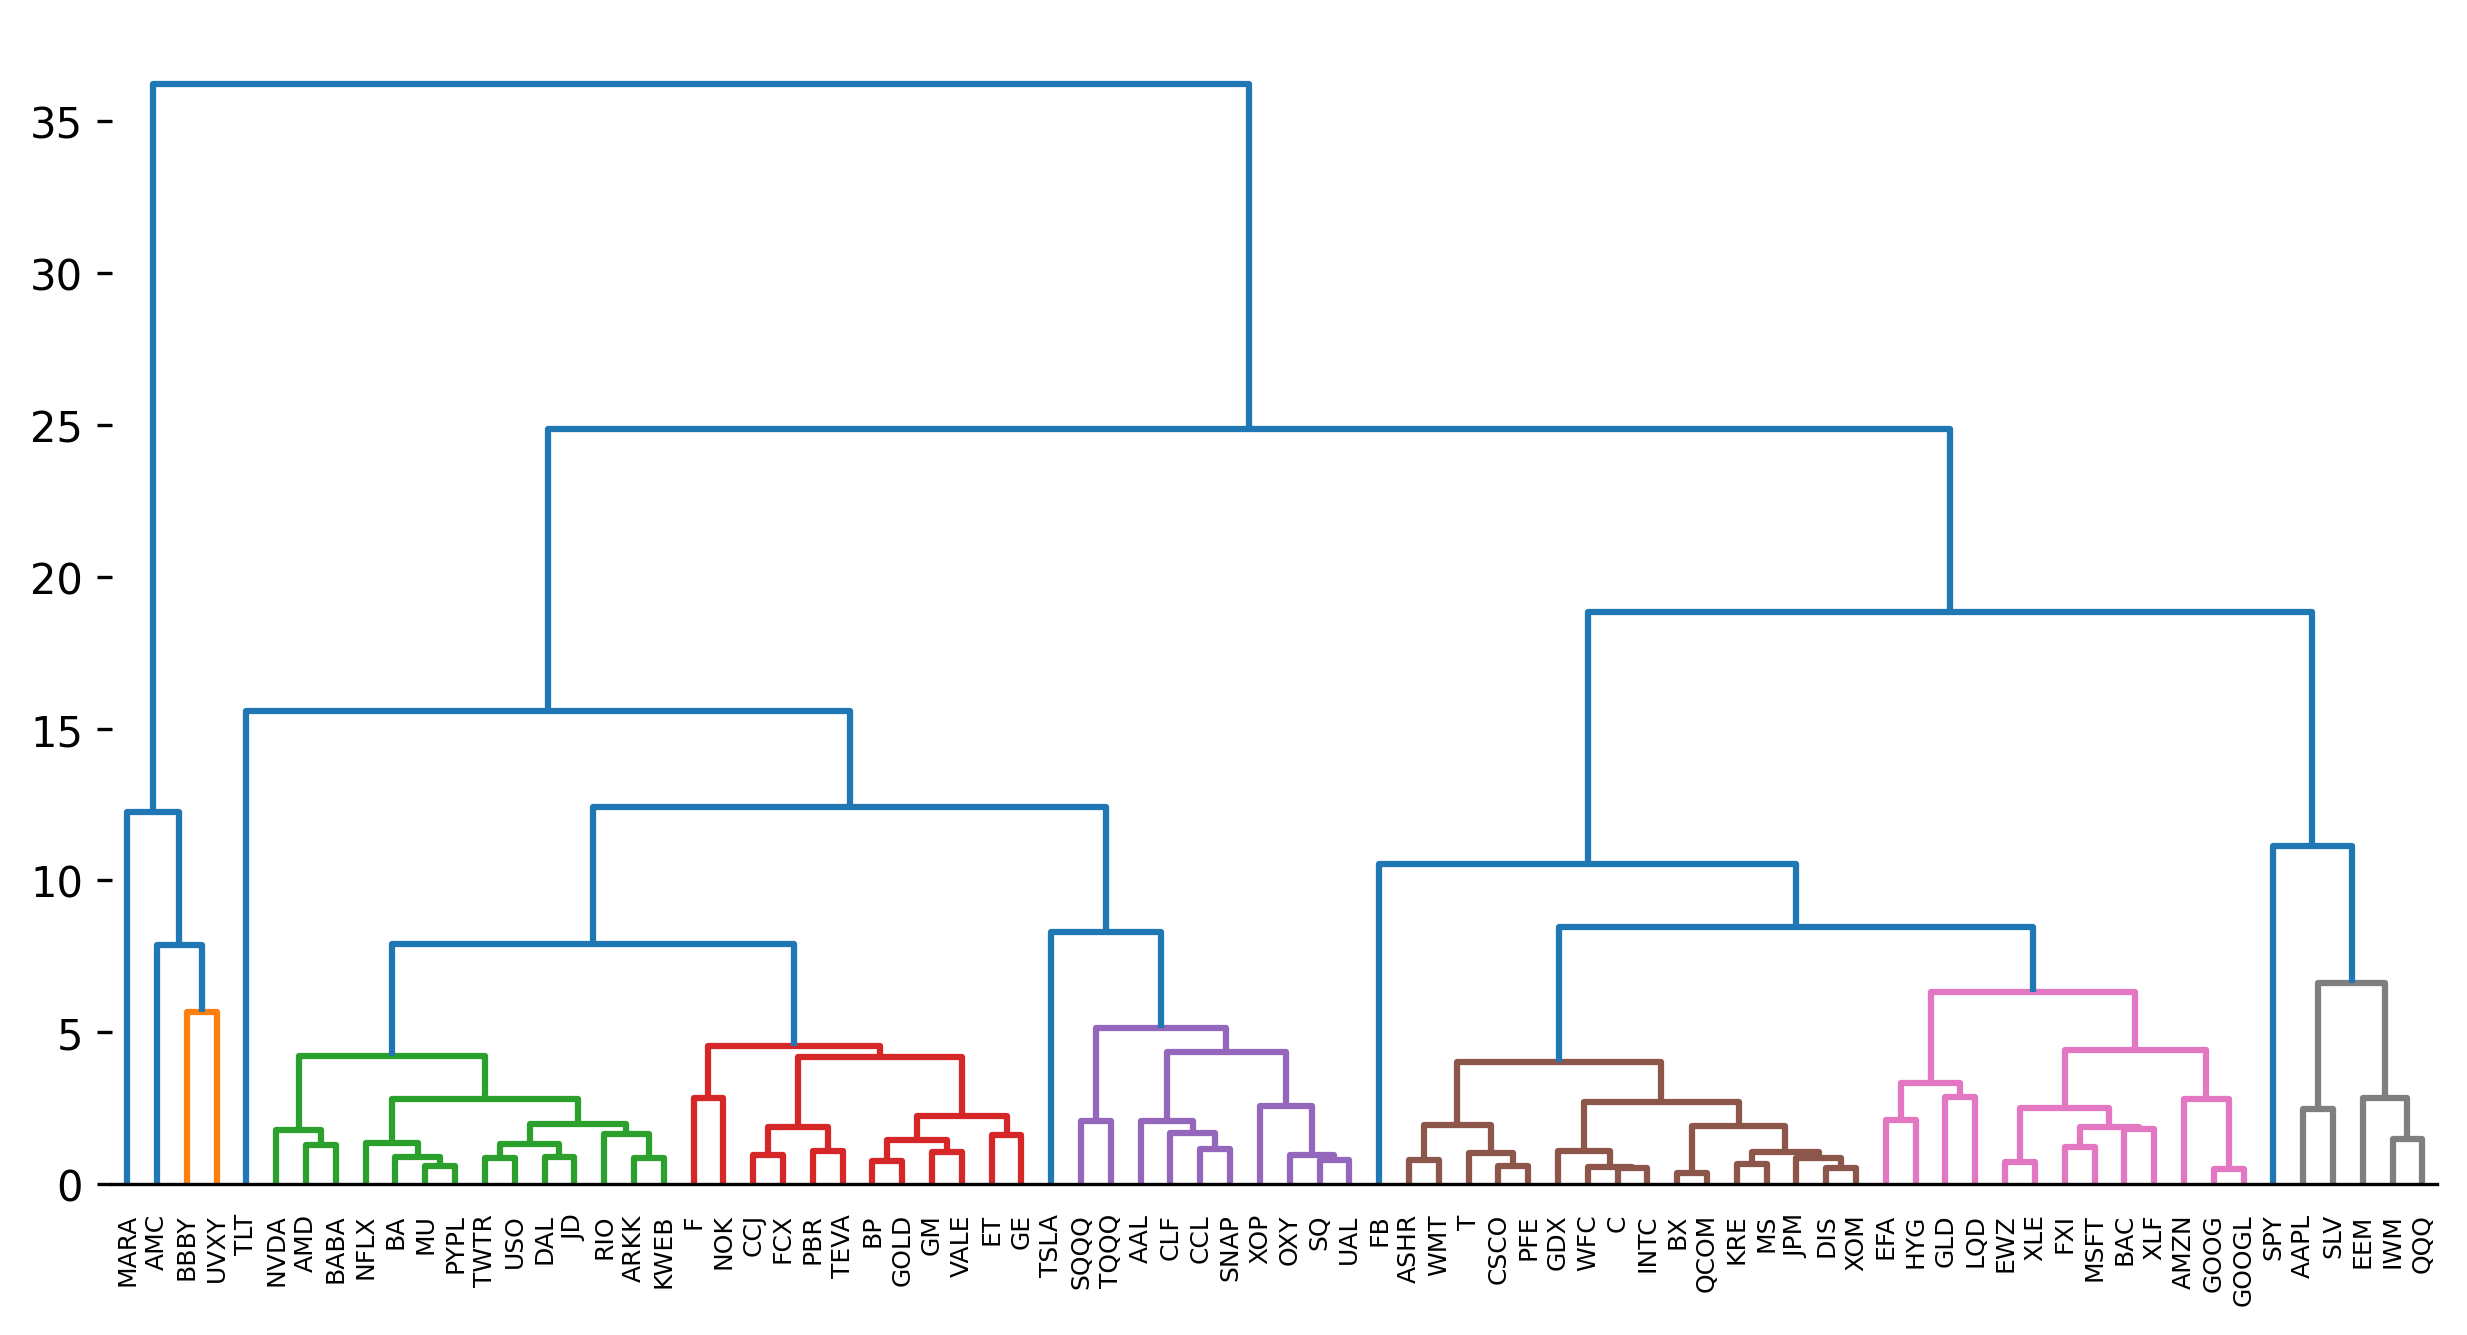

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_hc_scaled = scaler.fit_transform(data_hc)
linked = linkage(data_hc_scaled, 'ward')
fig, ax = plt.subplots(figsize=(10,5), dpi=300)

dendrogram(linked,
            orientation='top',
            distance_sort='ascending',
            show_leaf_counts=True,
            labels = data_hc.index,
            color_threshold=7, ax=ax )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.yaxis.set_visible(False)

plt.show()

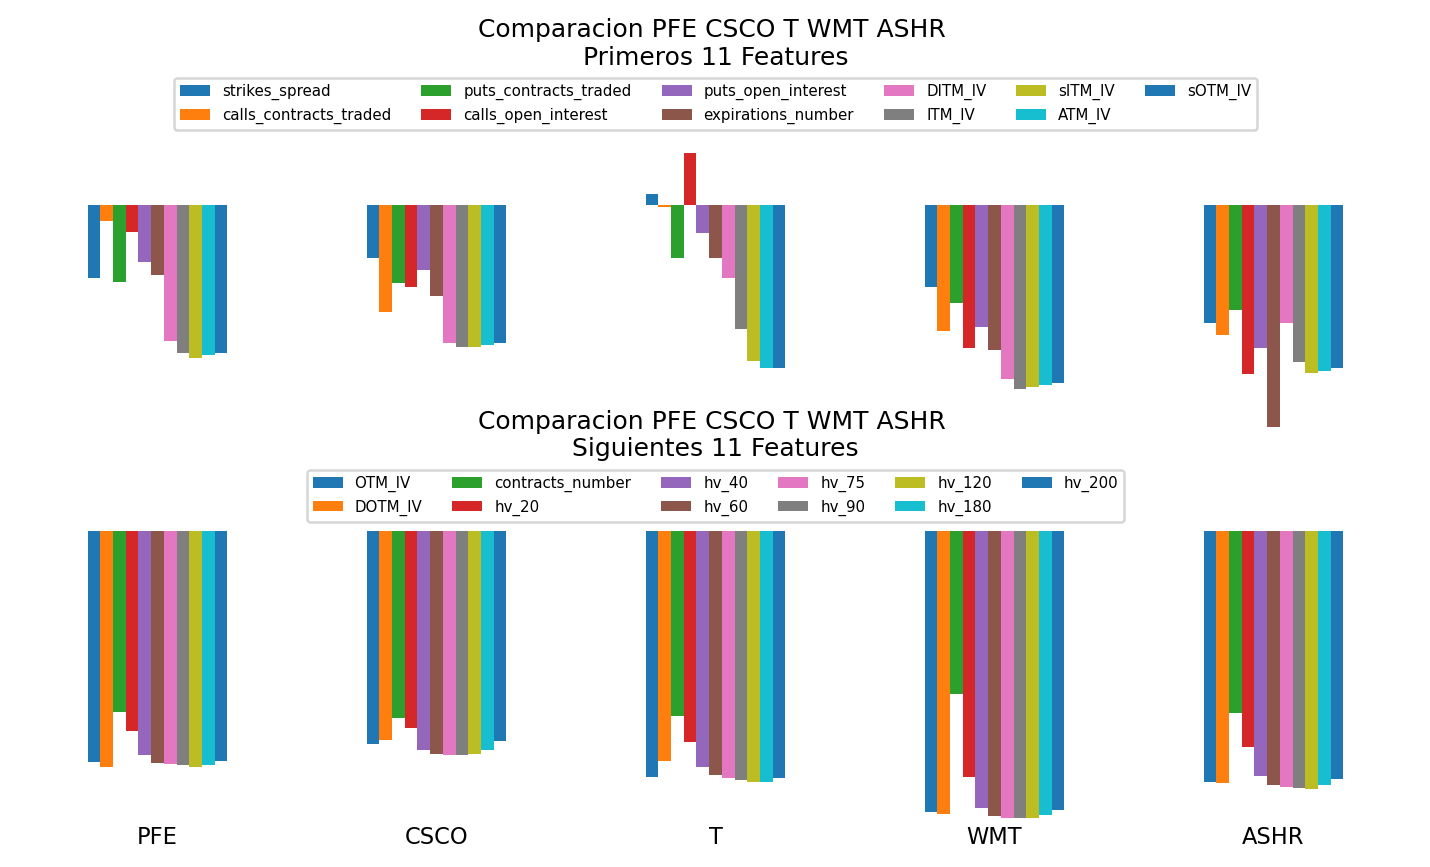

In [ ]:
# Visualicemos varios tickers de un mismo cluster

tickers = ['PFE','CSCO','T','WMT','ASHR']
c0 = pd.DataFrame(data_hc_scaled, index=data_hc.index, columns=data_hc.columns).loc[tickers].iloc[:,1:-1]

fig, ax = plt.subplots(figsize=(10,5), nrows=2)
c0.iloc[:,:11].plot(kind='bar', ax=ax[0])
ax[0].legend(ncols=6, fontsize=6, loc='upper center', bbox_to_anchor=(0.5,1.23))
ax[0].set_axis_off()
ax[0].set_title(f'Comparacion {" ".join(tickers)} \nPrimeros 11 Features', y=1.2, fontsize=10)

c0.iloc[:,11:].plot(kind='bar', ax=ax[1])
ax[1].legend(ncols=6, fontsize=6, loc='upper center', bbox_to_anchor=(0.5,1.23))
ax[1].set_axis_off()
ax[1].set_title(f'Comparacion {" ".join(tickers)} \nSiguientes 11 Features', y=1.2, fontsize=10)

for i, ticker in enumerate(tickers):
    ax[1].text(i, -1, ticker, ha='center', va='center', color='k', fontsize=9)

plt.subplots_adjust(hspace=0.30)

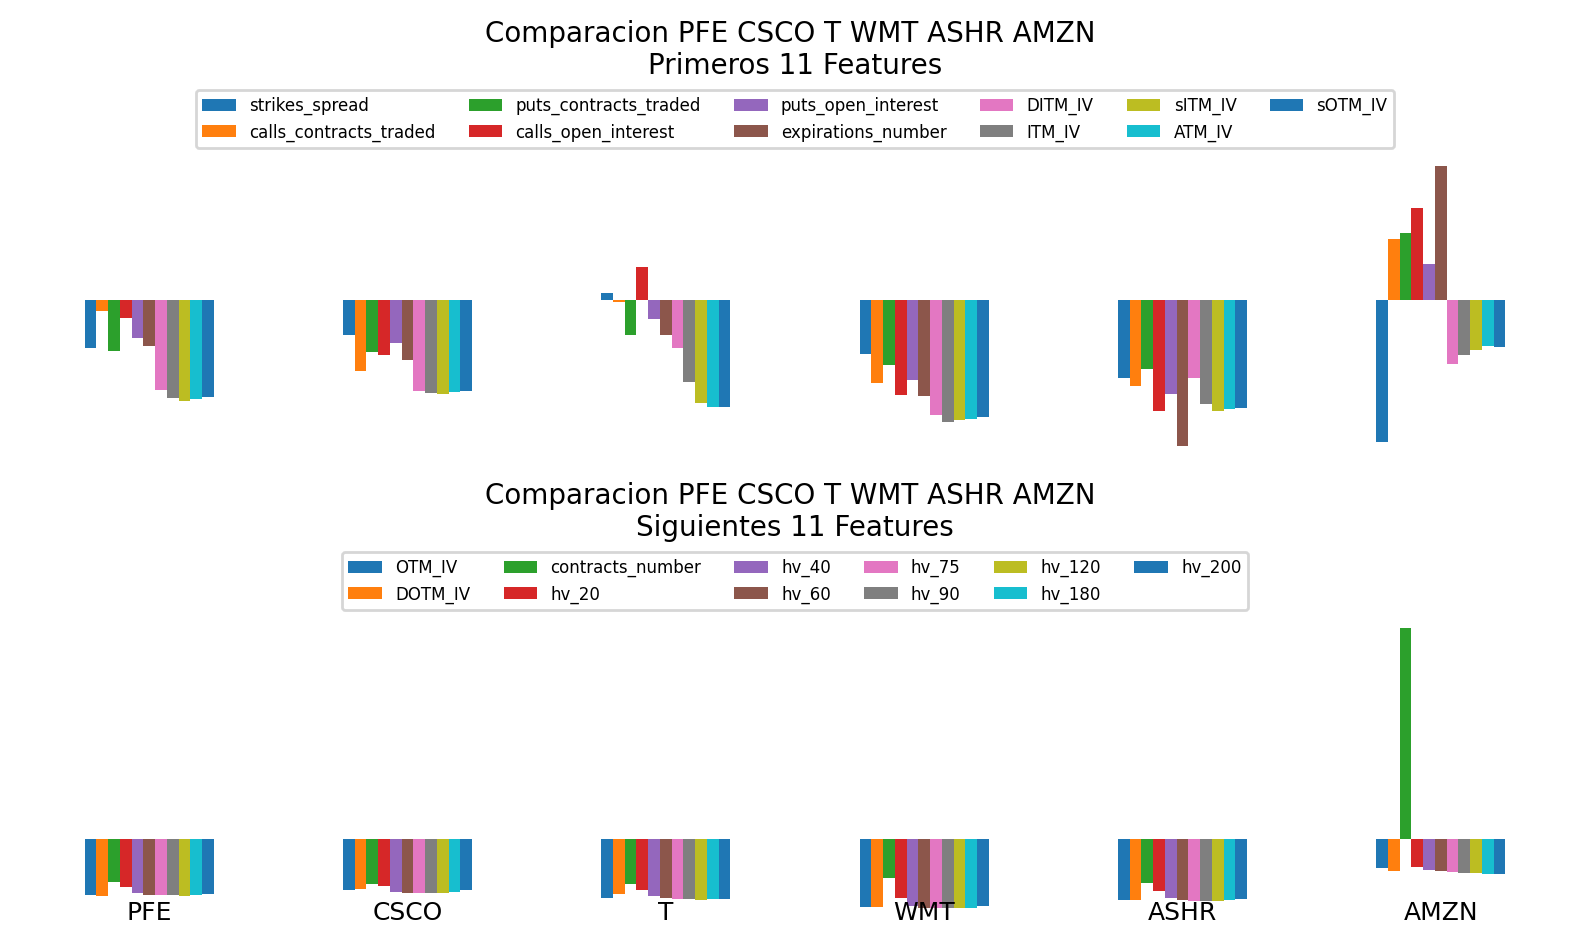

In [ ]:
# Visualicemos varios tickers de un mismo cluster
# Pero vean como descordina cuando comparamos con un elemento de cluster diferente

tickers = ['PFE','CSCO','T','WMT','ASHR','AMZN']
c0 = pd.DataFrame(data_hc_scaled, index=data_hc.index, columns=data_hc.columns).loc[tickers].iloc[:,1:-1]

fig, ax = plt.subplots(figsize=(10,5), nrows=2, dpi=200)
c0.iloc[:,:11].plot(kind='bar', ax=ax[0])
ax[0].legend(ncols=6, fontsize=6, loc='upper center', bbox_to_anchor=(0.5,1.23))
ax[0].set_axis_off()
ax[0].set_title(f'Comparacion {" ".join(tickers)} \nPrimeros 11 Features', y=1.2, fontsize=10)

c0.iloc[:,11:].plot(kind='bar', ax=ax[1])
ax[1].legend(ncols=6, fontsize=6, loc='upper center', bbox_to_anchor=(0.5,1.23))
ax[1].set_axis_off()
ax[1].set_title(f'Comparacion {" ".join(tickers)} \nSiguientes 11 Features', y=1.2, fontsize=10)

for i, ticker in enumerate(tickers):
    ax[1].text(i, -1, ticker, ha='center', va='center', color='k', fontsize=9)

plt.subplots_adjust(hspace=0.5)

## K-Means

Objetivo: Dado un conjunto de observaciones $(x_1, x_2, ..., x_n)$, donde cada observación es un vector de d dimensiones, K-means busca particionar las n observaciones en K (≤ n) conjuntos $S = \{S_1, S_2, ..., S_K\}$ de manera que se minimice la varianza intra-cluster (también conocida como suma de cuadrados dentro del clúster), que se define como:

$$\sum_{i=1}^{K} \sum_{x \in S_i} ||x - \mu_i||^2$$

donde $\mu_i$ es el centroide (valor medio) de las observaciones en el clúster $S_i$.

__Algoritmo:__

1. Selecciona inicialmente K puntos de los datos como los centros iniciales de los clústeres.

2. Asigna cada punto de datos al clúster cuyo centroide es el más cercano. Es decir, si $p$ es un punto de datos y $m_i$ es la representación del clúster $i$, entonces:

    $$p \in i \iff ||p - m_i||^2 \leq ||p - m_j||^2 \quad \forall j, j \neq i$$

3. Recalcula los centroides de los clústeres como el promedio de todos los puntos de datos en el clúster:

    $$m_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$$

    donde $|C_i|$ es el número de puntos de datos en el i-ésimo clúster.

4. Repite los pasos 2 y 3 hasta que los puntos de datos ya no cambien de clúster, o se alcance un número máximo de iteraciones.

Tanto el objetivo como el algoritmo buscan minimizar la distancia de cada punto de datos a su centroide del clúster, que es la definición de la varianza intra-cluster.


In [ ]:
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns

tickers = ['YPF', 'CL=F']
oil_data = yf.download(tickers, start="2000-01-01", auto_adjust=True)
oil_data = oil_data.Close.interpolate().dropna()
oil_data_yields = oil_data.pct_change()

[*********************100%%**********************]  2 of 2 completed


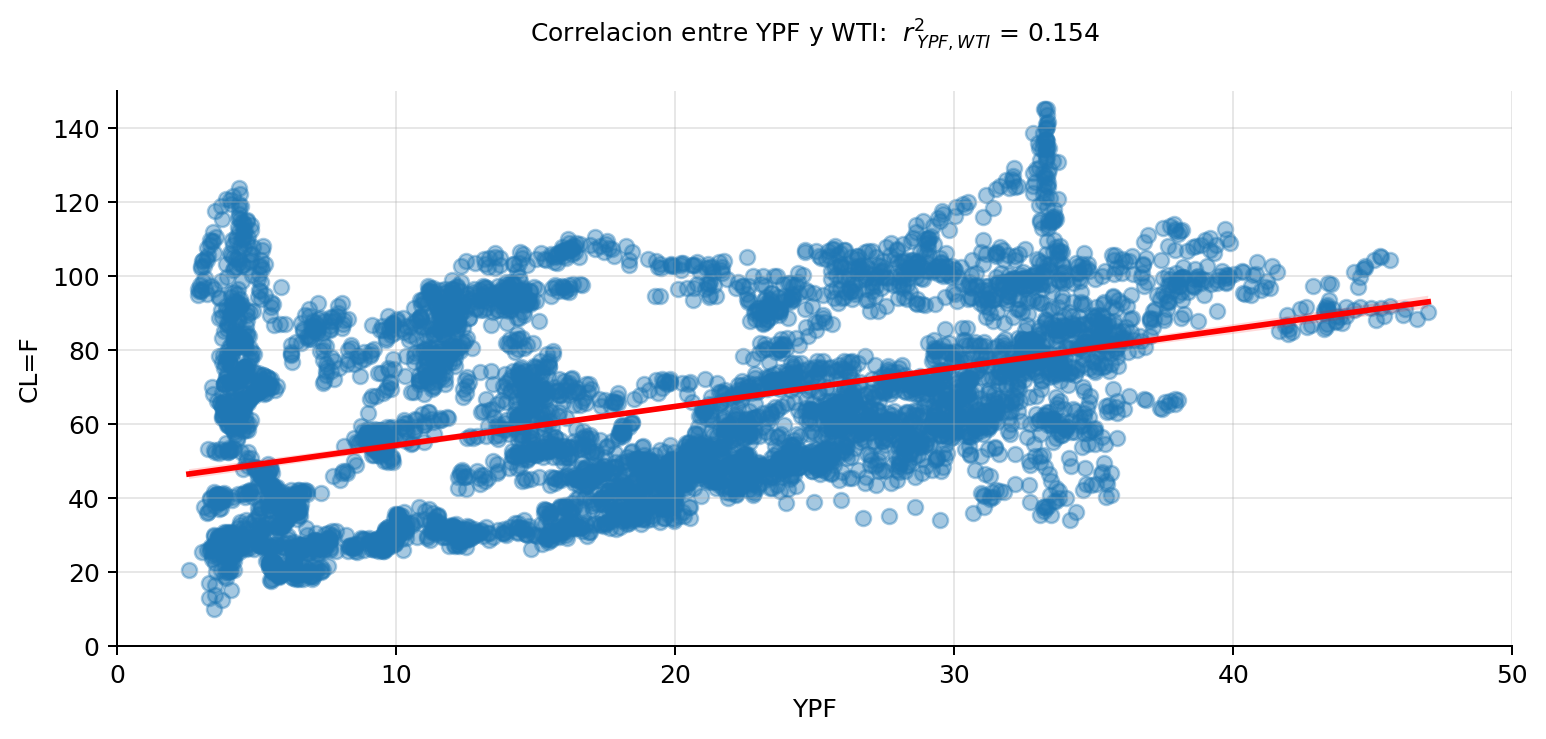

In [ ]:
plt.rcParams['figure.dpi'] = 180
fig, ax = plt.subplots(figsize=(10, 4))
col_a, col_b = tickers[0], tickers[1]

scatter = ax.scatter(oil_data[col_a], oil_data[col_b], alpha=0.4)
sns.regplot(x=oil_data[col_a], y=oil_data[col_b], scatter=False, ax=ax, color='red')

r2_a = oil_data_yields[col_a].corr(oil_data_yields[col_b])

title = f'Correlacion entre {col_a} y WTI:  '
title += rf'$r^2_{{\: {col_a}, WTI }}$ = {r2_a:.3f}' + '\n'

ax.set_title(title, fontsize=10)
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0,50)
ax.set_ylim(0,150)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df_cluster = oil_data[tickers]
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
clusters = 7
kmeans = KMeans(n_clusters=clusters, n_init=1)
kmeans.fit(df_cluster)
oil_data.loc[:,'cluster'] = kmeans.labels_
oil_data_yields.loc[:,'cluster'] = kmeans.labels_

res = []
for i in range(clusters):
    segm_pxs = oil_data.loc[oil_data.cluster==i]
    segm = oil_data_yields.loc[oil_data_yields.cluster==i]
    r2 = segm[tickers[0]].corr(segm[tickers[1]])
    res.append({
        f'{tickers[0]}_px_medio': segm_pxs[tickers[0]].mean(),
        f'{tickers[0]}_px_min': segm_pxs[tickers[0]].min(),
        f'{tickers[0]}_px_max': segm_pxs[tickers[0]].max(),
        f'{tickers[1]}_px_medio': segm_pxs[tickers[1]].mean(),
        f'{tickers[1]}_px_min': segm_pxs[tickers[1]].min(),
        f'{tickers[1]}_px_max': segm_pxs[tickers[1]].max(),
        'Cantidad':len(segm),
        'r2':r2,
    })

pd.DataFrame(res)

,YPF_px_medio,YPF_px_min,YPF_px_max,CL=F_px_medio,CL=F_px_min,CL=F_px_max,Cantidad,r2
0,9.818876,3.250000,19.041636,66.729425,52.200001,79.349998,661,0.300949
1,26.825023,3.520000,39.895077,112.063483,100.669998,145.289993,356,0.079190
2,8.597168,2.570000,20.535677,29.925646,-37.630001,45.340000,1153,0.145559
3,9.892830,2.910000,21.122915,92.026178,79.360001,113.230003,586,0.272857
4,32.624457,21.180737,46.989063,92.200959,79.019997,105.440002,709,0.262594
5,28.466491,19.307886,38.017536,66.962630,53.619999,80.570000,1057,0.228321
6,20.659588,4.520000,35.635323,48.077316,33.869999,59.090000,1261,0.269703


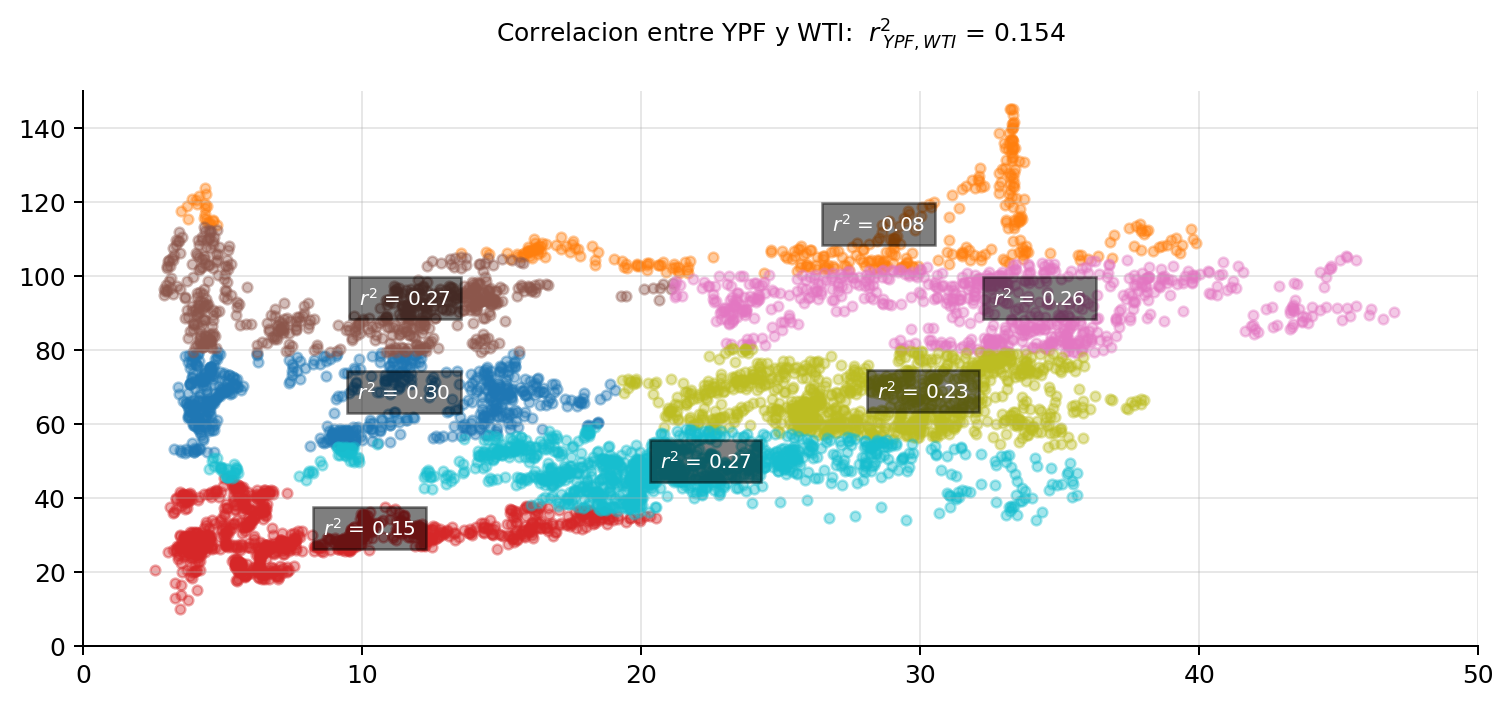

In [ ]:
plt.rcParams['figure.dpi'] = 180
fig, ax = plt.subplots(figsize=(10, 4))
col_a, col_b = tickers[0], tickers[1]

cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in np.linspace(0, 1, clusters)]

for i in range(clusters):
    df_ = oil_data.loc[oil_data.cluster==i]
    df_yields = oil_data_yields.loc[oil_data.cluster==i]
    scatter = ax.scatter(df_[col_a], df_[col_b], s=15, color=colors[i], alpha=0.4)
    r2 = df_yields[col_a].corr(df_yields[col_b])
    centroid_x = df_[col_a].mean()
    centroid_y = df_[col_b].mean()
    ax.text(centroid_x, centroid_y, rf"$r^2$ = {r2:.2f}", color="white",
            bbox=dict(facecolor="black", alpha=0.5), fontsize=8)


title = f'Correlacion entre {col_a} y WTI:  '
title += rf'$r^2_{{\: {col_a}, WTI }}$ = {r2_a:.3f}' + '\n'
ax.set_title(title, fontsize=10)
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0,50)
ax.set_ylim(0,150)
plt.show()

In [ ]:
# Encapsulamos esto y lo hacemos para otro ejemplo

def viewCorrs(tickers, clusters = 7):
    oil_data = yf.download(tickers, start="2000-01-01", auto_adjust=True)
    oil_data = oil_data.Close.interpolate().dropna()
    oil_data_yields = oil_data.pct_change()

    df_cluster = oil_data[tickers]
    scaler = StandardScaler()
    df_cluster_scaled = scaler.fit_transform(df_cluster)
    kmeans = KMeans(n_clusters=clusters, n_init=1)
    kmeans.fit(df_cluster)
    oil_data.loc[:,'cluster'] = kmeans.labels_
    oil_data_yields.loc[:,'cluster'] = kmeans.labels_

    fig, ax = plt.subplots(figsize=(10, 4))
    col_a, col_b = tickers[0], tickers[1]

    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in np.linspace(0, 1, clusters)]

    res = []
    for i in range(clusters):
        df_ = oil_data.loc[oil_data.cluster==i]
        df_yields = oil_data_yields.loc[oil_data.cluster==i]
        scatter = ax.scatter(df_[col_a], df_[col_b], s=15, color=colors[i], alpha=0.4)
        r2 = df_yields[col_a].corr(df_yields[col_b])
        centroid_x = df_[col_a].mean()
        centroid_y = df_[col_b].mean()
        ax.text(centroid_x, centroid_y, rf"Cluster: {i}, $r^2$ = {r2:.2f}", color="white",
                bbox=dict(facecolor="black", alpha=0.5, edgecolor='none', pad=2), fontsize=8)
        res.append({
            f'{tickers[0]}_px_medio': df_[tickers[0]].mean(),
            f'{tickers[0]}_px_min': df_[tickers[0]].min(),
            f'{tickers[0]}_px_max': df_[tickers[0]].max(),
            f'{tickers[1]}_px_medio': df_[tickers[1]].mean(),
            f'{tickers[1]}_px_min': df_[tickers[1]].min(),
            f'{tickers[1]}_px_max': df_[tickers[1]].max(),
            'Cantidad':len(segm),
            'r2':r2,
        })

    r2 = oil_data_yields[tickers[0]].corr(oil_data_yields[tickers[1]])
    title = f'Correlacion entre {col_a} y WTI:  '
    title += rf'$r^2_{{\: {col_a}, WTI }}$ = {r2:.3f}' + '\n'
    ax.set_title(title, fontsize=11, y=0.9)
    ax.grid(alpha=0.3)
    ax.set_xlabel(f'Precio {tickers[0]}')
    ax.set_ylabel(f'Precio {tickers[1]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,150)
    plt.show()
    return (pd.DataFrame(res))

[*********************100%%**********************]  2 of 2 completed


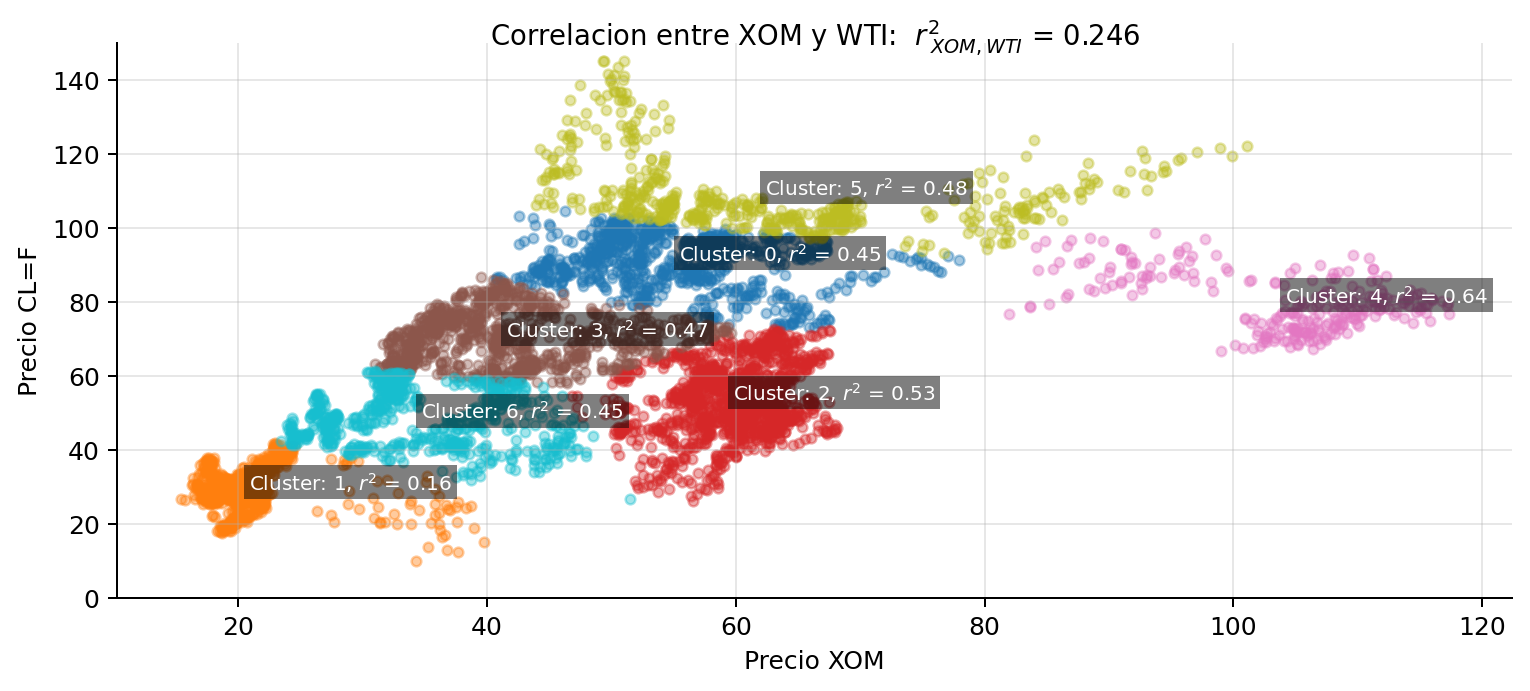

,XOM_px_medio,XOM_px_min,XOM_px_max,CL=F_px_medio,CL=F_px_min,CL=F_px_max,Cantidad,r2
0,55.413792,40.758644,77.964630,91.092281,72.940002,104.550003,1261,0.453962
1,20.843506,15.369600,39.742622,29.090833,-37.630001,41.720001,1261,0.158042
2,59.755980,46.809052,68.126411,53.380693,26.209999,72.760002,1261,0.526607
3,41.551498,30.953550,59.625572,70.575365,57.970001,86.589996,1261,0.470741
4,104.142068,81.961967,117.321945,79.710929,66.739998,98.620003,1261,0.636373
5,62.341438,43.910938,101.094437,108.840447,93.099998,145.289993,1261,0.480742
6,34.728565,23.404097,51.508331,48.431374,26.549999,61.220001,1261,0.452522


In [ ]:
viewCorrs(['XOM', 'CL=F'], clusters=7)

[*********************100%%**********************]  2 of 2 completed


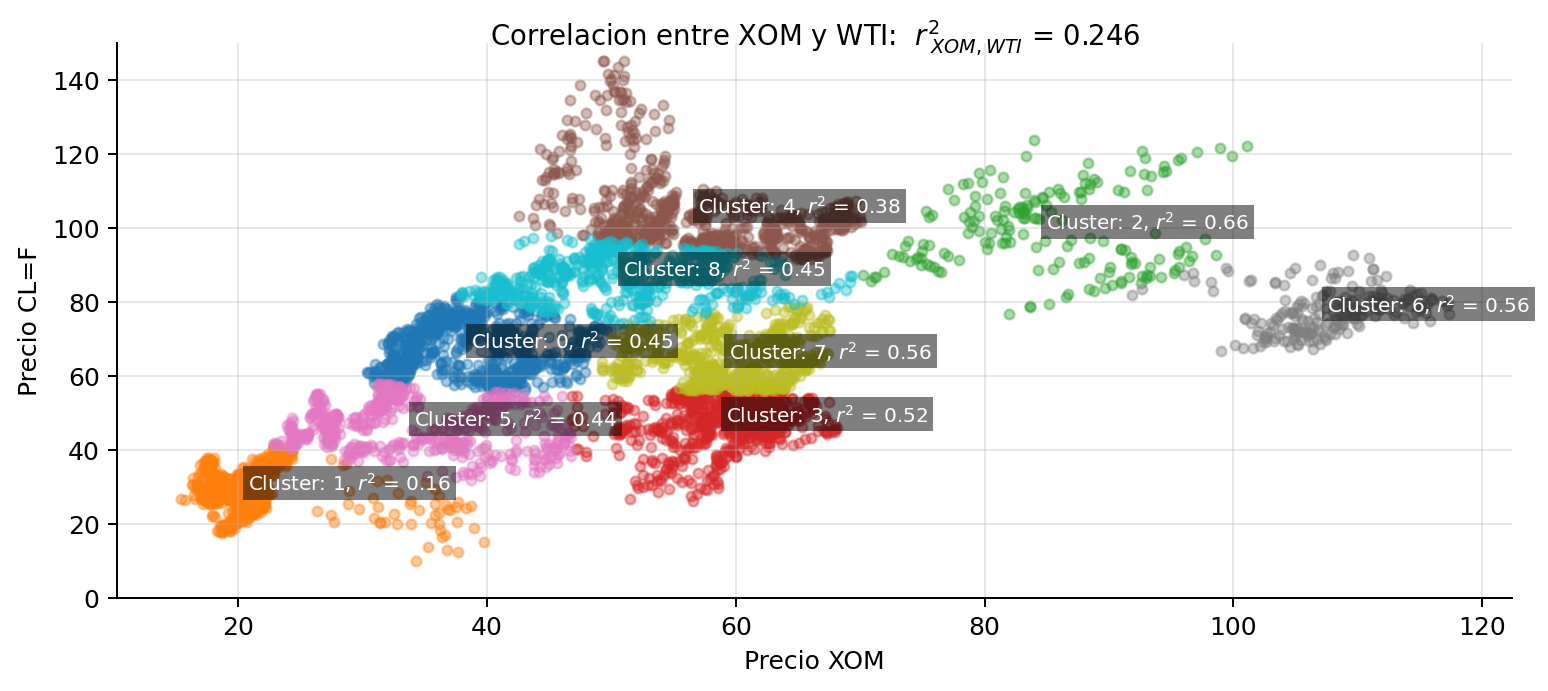

,XOM_px_medio,XOM_px_min,XOM_px_max,CL=F_px_medio,CL=F_px_min,CL=F_px_max,Cantidad,r2
0,38.718231,30.348780,49.944584,67.364535,55.689999,81.480003,1261,0.448449
1,20.769329,15.369596,39.742622,28.937515,-37.630001,41.080002,1261,0.157659
2,84.921268,70.186150,101.094444,99.564261,76.709999,123.699997,1261,0.664948
3,59.230219,46.733105,68.126419,47.490515,26.209999,55.970001,1261,0.524466
4,56.973039,42.540535,70.034981,103.909478,91.519997,145.289993,1261,0.381237
5,34.097128,22.814974,46.762314,46.264631,31.820000,57.880001,1261,0.442766
6,107.547340,91.877823,117.321945,77.327814,66.739998,92.610001,1261,0.563396
7,59.483905,49.228878,67.539543,64.555843,55.959999,78.900002,1261,0.562604
8,50.966812,37.926163,69.334473,86.861717,74.019997,97.879997,1261,0.447291


In [ ]:
viewCorrs(['XOM', 'CL=F'], clusters=9)

## Metodos para optimizar N

### Metodo del Codo

El método del Codo se basa en el cálculo de la Suma de los Cuadrados de las Distancias dentro del Cluster (WCSS por sus siglas en inglés). Dado un conjunto de puntos $x_i \in \mathbb{R}^n$, y un conjunto de centroides de los clusters $c_j \in \mathbb{R}^n$, donde $i$ va desde $1$ hasta $N$ (el número total de puntos) y $j$ va desde $1$ hasta $K$ (el número total de clusters), la WCSS se calcula como:

$$ \large WCSS = \sum_{j=1}^{K} \sum_{i=1}^{N} ||x_{i} - c_{j}||^{2}$$

[*********************100%%**********************]  2 of 2 completed


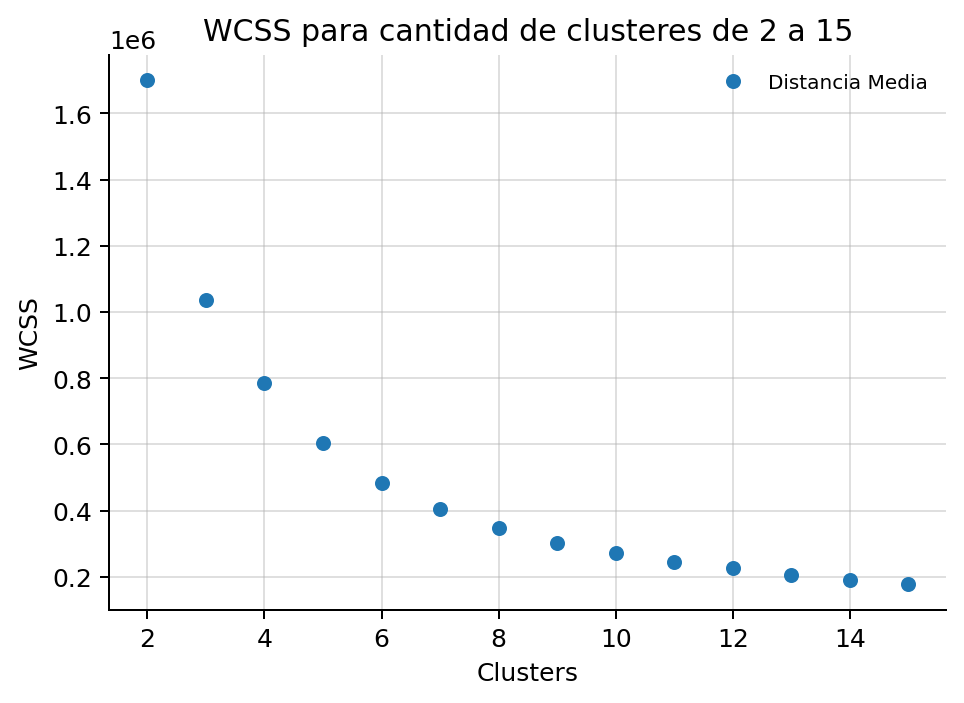

In [ ]:
oil_data = yf.download(tickers, start="2000-01-01", auto_adjust=True)
oil_data = oil_data.Close.interpolate().dropna()
oil_data_yields = oil_data.pct_change()

df_cluster = oil_data[tickers]
fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(df_cluster)  for n in range(2,pruebas+1)]

distancia_media = [m.inertia_ for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), distancia_media, lw=0, marker='o', markersize=5, label='Distancia Media')
ax.legend(frameon=False, fontsize=8)
ax.set_xlabel('Clusters')
ax.set_ylabel('WCSS')
ax.set_title('WCSS para cantidad de clusteres de 2 a 15')
ax.grid(alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Metodo de la silueta

Este score mide cuán similar es una observación a su propio cluster comparado con otros clusters. El score va de -1 a +1, donde un valor alto indica que la observación es bien parecida a su propio cluster y distinta a las observaciones de otros clusters


El Silhouette Score se basa en la comparación de las distancias promedio dentro de los clusters y las distancias promedio a los otros clusters. Para un punto $x_i$, la distancia promedio a todos los demás puntos en el mismo cluster se denota como $a(i)$, y la distancia promedio a todos los puntos en el cluster más cercano (que no es el propio cluster del punto) se denota como $b(i)$. Luego, el Silhouette Score para el punto $x_i$ se calcula como:


para cada punto:
   * a: distancia media intercluster
   * b: distancia mas cercana al cluster vecino

$$ \large s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}} \hspace{10mm} \small \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
$$

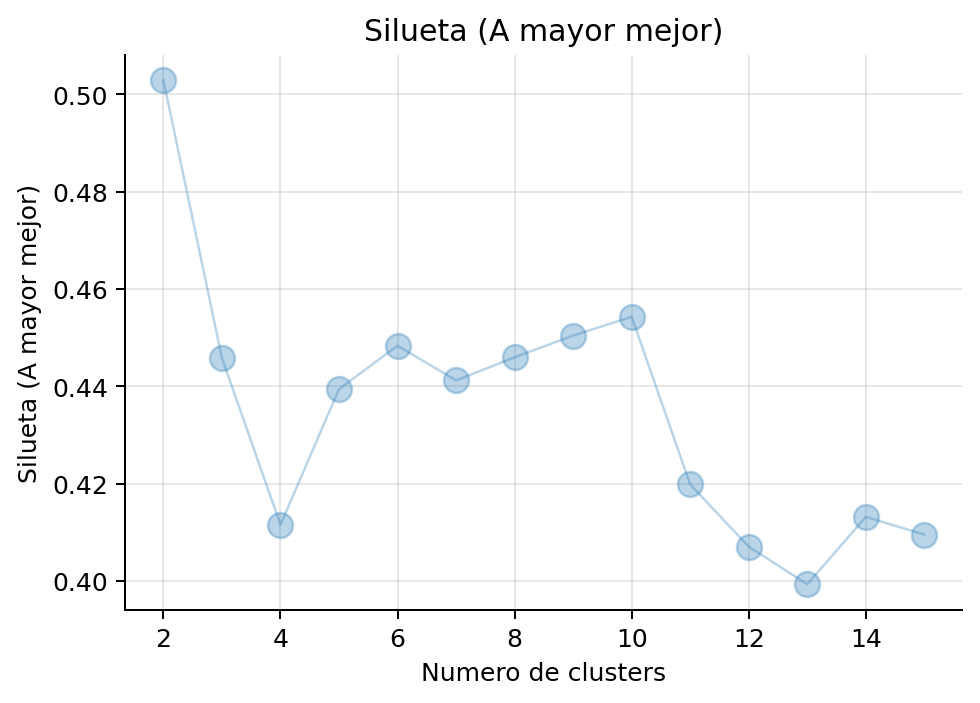

In [ ]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(df_cluster)  for n in range(2,pruebas+1)]

siluetas = [silhouette_score(df_cluster, m.labels_) for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta', marker='o', markersize=10, alpha=0.3, lw=1)
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Silueta (A mayor mejor)')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Silueta (A mayor mejor)')
plt.show()

### Formula taylor made

Implementamos una formula que pondera proporcionalmente al score de la silueta (numerador) y pondera en forma inversamente proporcional (ya que un numero mayor es peor) a la distancia media WCSS pero regularizamos por cantidad de clusters K (tambien en el denominador porque a mayor cantidad de clusteres mas penaliza porq si fueran igual cantidad de clusters que puntos la distancia tiende a cero obviamente, de hecho penalizamos el valor elevado al cuadrado para ser mas estrictos con este punto)

$$ \large F = \frac{S}{WCSS \cdot K^2}$$

Donde:

- $F$ es el valor de la formula taylor made
- $S$ son los valores del Silhouette Score
- $WCSS$ son las distancias de cada punto a su centroide
- $K$ es el número de clusters

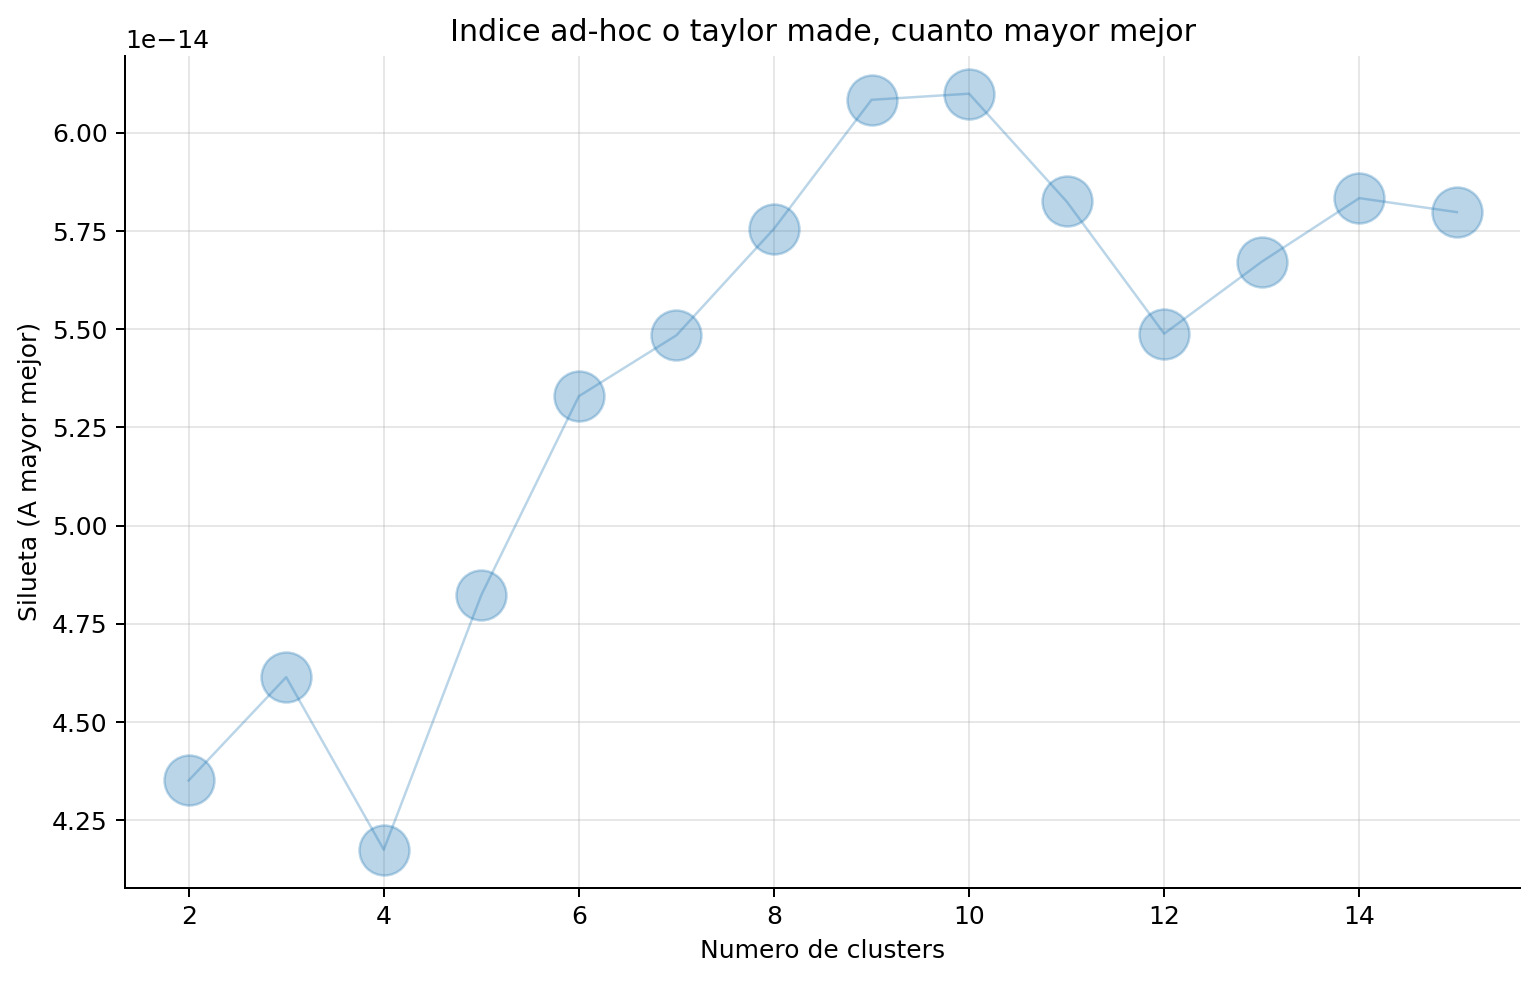

In [ ]:
import numpy as np
import pandas as pd

pruebas = 15
res = pd.DataFrame(np.array(siluetas) / (np.array(distancia_media) * np.arange(2,pruebas+1))**2, index=range(2,pruebas+1))
fig, ax = plt.subplots(figsize=(10,6), nrows=1)

ax.grid(alpha=0.3)
ax.plot(res, marker='o', markersize=20, alpha=0.3, lw=1, label='Indice taylor made')
ax.set_title('Indice ad-hoc o taylor made, cuanto mayor mejor')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Silueta (A mayor mejor)')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Indice Davies Bouldin

$$ \large DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)$$

Donde:

- $DB$ es el Índice de Davies-Bouldin
- $k$ es el número de clusters
- $s_i$ es la media de las distancias entre cada punto en el cluster $i$ y el centroide del cluster $i$
- $d_{ij}$ es la distancia entre los centroides de los clusters $i$ y $j$

La idea del índice de Davies-Bouldin es identificar conjuntos de datos que están bien separados
<br>O sea, los buenos clusters tendrán baja varianza intra-cluster (dado por $s_i$) y alta separación inter-cluster (dado por $d_{ij}$)
<br>Como resultado, un valor de $DB$ más bajo indica un mejor agrupamiento o N óptimo

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

idb = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=1, random_state=0)
    y_means = kmeans.fit_predict(df_cluster)
    idb.append(davies_bouldin_score(df_cluster, y_means))

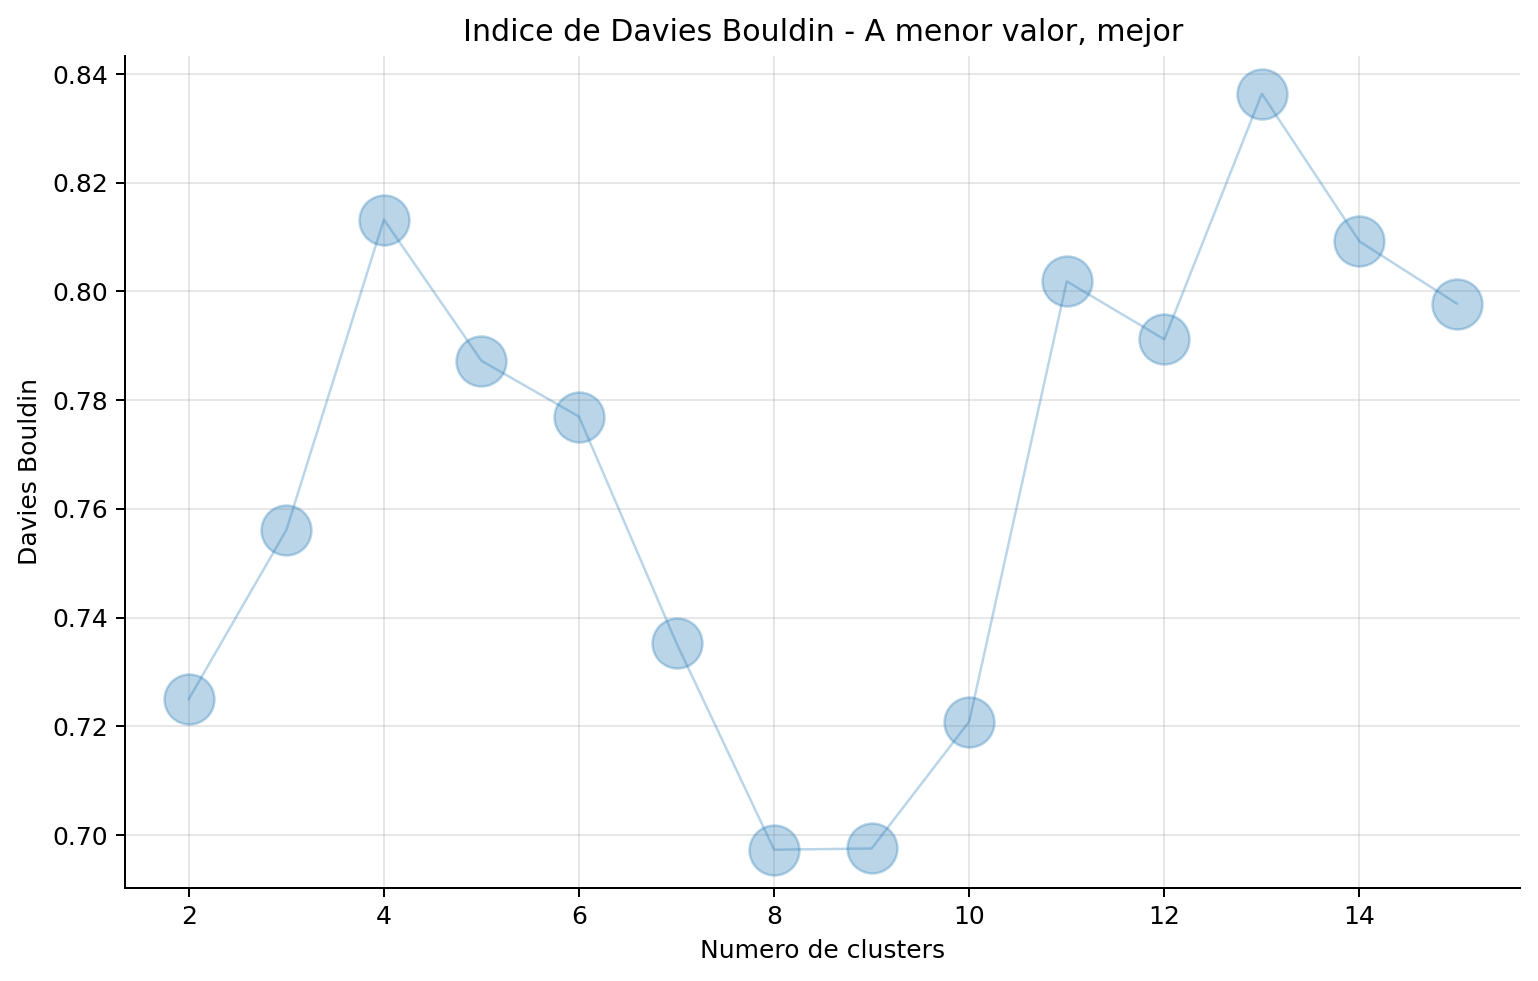

In [ ]:
import pandas as pd

idb_df = pd.Series(idb, index=list(range(2,16)))
fig, ax = plt.subplots(figsize=(10,6), nrows=1)

ax.plot(idb_df, marker='o', markersize=20, alpha=0.3, lw=1, label='Davies Bouldin')
ax.set_title('Indice de Davies Bouldin - A menor valor, mejor')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Davies Bouldin')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Indice de Calinski Harabasz

$$ \large CH = \frac{B_k/(k-1)}{W_k/(n-k)}$$

Donde:

- $CH$ es el índice de Calinski-Harabasz
- $B_k$: Dispersión entre los clusters (suma de distancias cuadradas de los centroides de los clusters al centroide de todos los datos
- $W_k$: Dispersión dentro de los clusters (suma de las distancias cuadradas de todos los datos a los centroides de sus clusters)
- $k$ es el número de clusters
- $n$ es el número total de datos.

La idea del índice de Calinski-Harabasz es que los buenos agrupamientos tendrán una alta dispersión entre los clusters y una baja dispersión dentro de los clusters. Por lo tanto, un valor de $CH$ más alto indica un mejor agrupamiento

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

ich = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=1, random_state=0)
    y_means = kmeans.fit_predict(df_cluster)
    ich.append(calinski_harabasz_score(df_cluster, y_means))

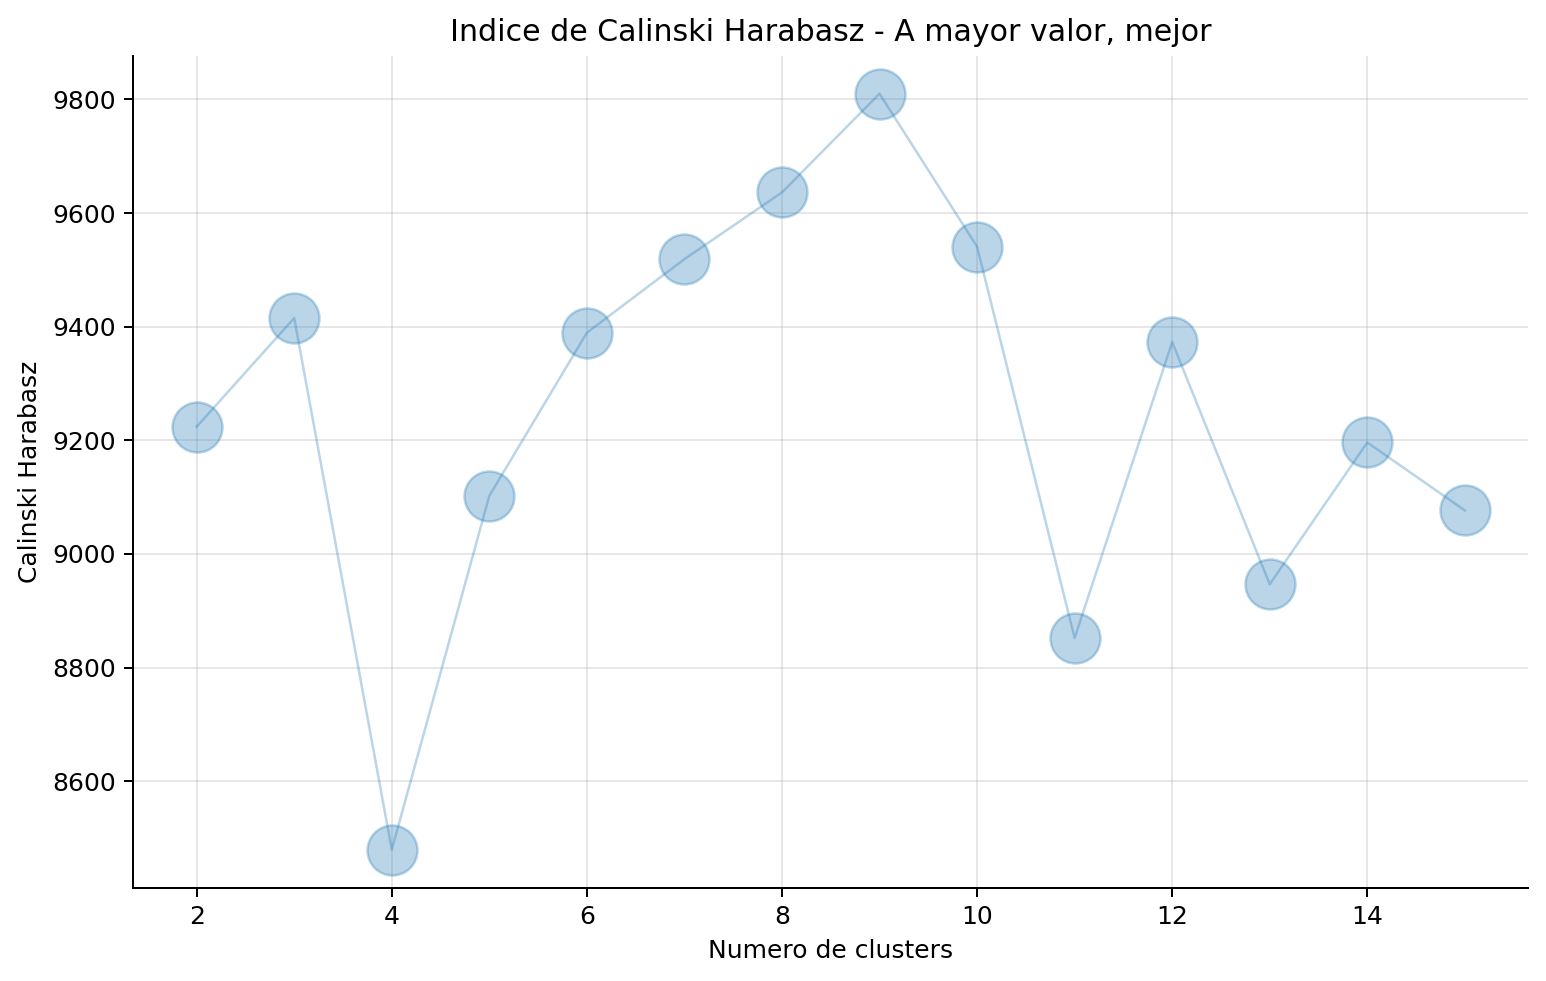

In [ ]:
ich_df = pd.Series(ich, index=list(range(2,16)))
fig, ax = plt.subplots(figsize=(10,6), nrows=1)

ax.plot(ich_df, marker='o', markersize=20, alpha=0.3, lw=1)
ax.set_title('Indice de Calinski Harabasz - A mayor valor, mejor')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Calinski Harabasz')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Comparativa final normalizada

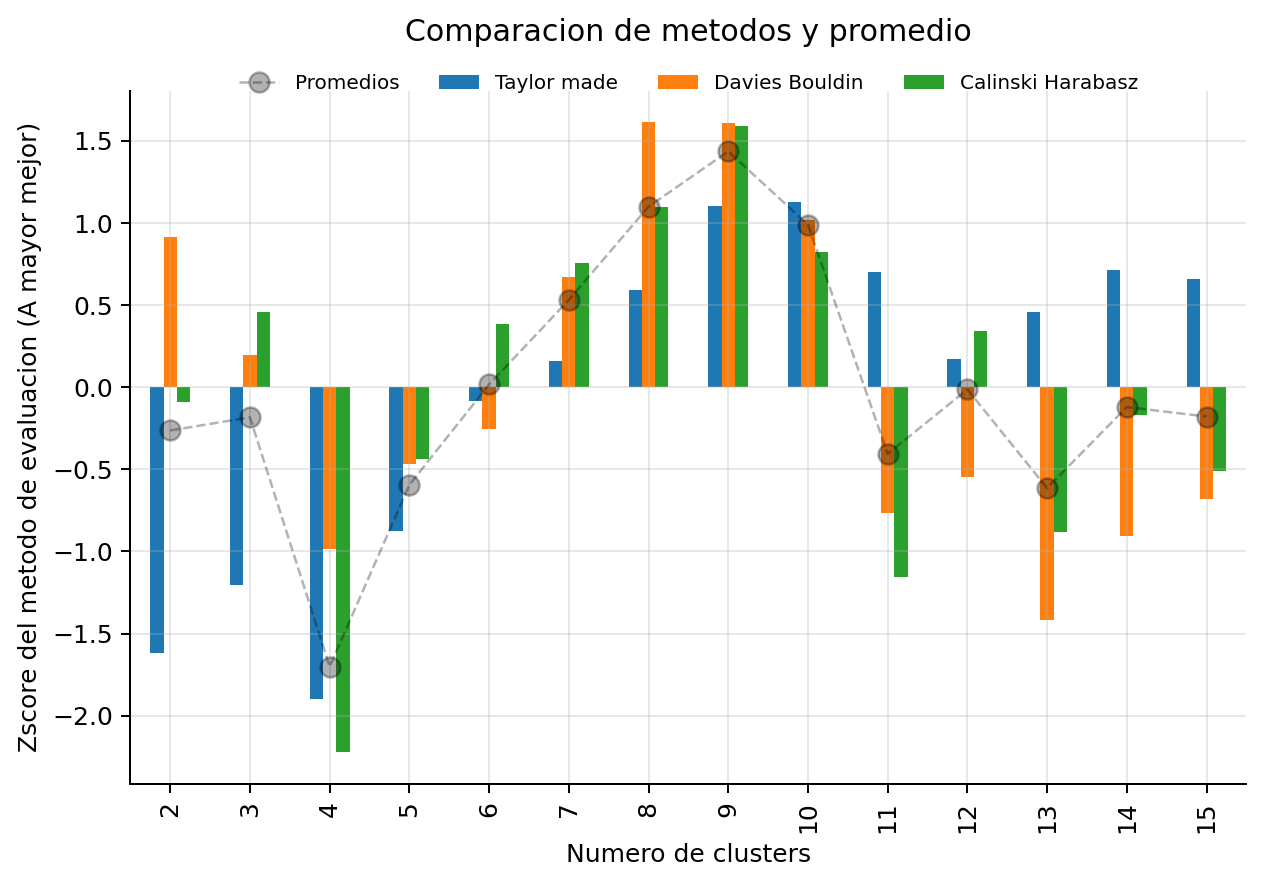

In [ ]:
metrics = pd.concat([res, idb_df, ich_df], axis=1)
metrics.columns=['Taylor made', 'Davies Bouldin', 'Calinski Harabasz']
metrics['Davies Bouldin'] =  1/metrics['Davies Bouldin']
metrics = (metrics - metrics.mean()) / metrics.std()
metrics['Promedio'] = metrics.mean(axis=1)
fig, ax = plt.subplots(figsize=(8,5), nrows=1)
metrics.iloc[:,:-1].plot(kind='bar', ax=ax)
ax.plot(metrics.iloc[:,-1].index.values- 2, metrics.iloc[:,-1], ls='--',
        marker='o', markersize=8, c='k', lw=1, label='Promedios', alpha=0.3)

ax.legend(loc='upper center', ncols=4, fontsize=8, bbox_to_anchor=(0.5,1.05), frameon=False)
ax.set_title('Comparacion de metodos y promedio', y=1.05)
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Zscore del metodo de evaluacion (A mayor mejor)')
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Mezcla Gaussiana

El modelo de mezcla gaussiana (Gaussian Mixture Model, GMM) es una herramienta útil para modelar datos multivariantes cuando se sospecha que los datos pueden estar compuestos por múltiples "subpoblaciones". Es un modelo de mezcla que utiliza la distribución gaussiana (normal) para modelar estas subpoblaciones.

Formalmente, un GMM intenta encontrar una mezcla de distribuciones gaussianas de múltiples dimensiones que mejor modelen los datos. Podemos escribir esta mezcla de gaussianas de la siguiente manera:

$$ \large p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \mathbf{\mu_k}, \mathbf{\Sigma_k}) $$

Donde:

- $\mathbf{x}$ es un vector de observaciones
- $K$ es el número de componentes en la mezcla
- $\pi_k$ es la proporción de la $k$-ésima gaussiana en la mezcla
  <br>Es decir, la probabilidad de que una observación arbitraria provenga de la componente $k$:
  <br>Tenemos que $\sum_{k=1}^{K} \pi_k = 1$
- $\mathcal{N}(\mathbf{x} | \mathbf{\mu_k}, \mathbf{\Sigma_k})$ es la $k$-ésima distribución gaussiana con media $\mathbf{\mu_k}$ y matriz de covarianza $\mathbf{\Sigma_k}$

  
$$ \mathcal{N}(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right) $$

Donde $d$ es el número de dimensiones, y $|\Sigma|$ es el determinante de la matriz de covarianza $\Sigma$.

El objetivo de GMM es maximizar la verosimilitud de los datos dado el modelo, lo cual se hace ajustando los parámetros $\pi_k$, $\mathbf{\mu_k}$, y $\mathbf{\Sigma_k}$ usando el algoritmo de Expectation-Maximization (EM)


Las fórmulas para la actualización de los parámetros en el algoritmo EM son:

1. E-step: calcular las responsabilidades, que es la probabilidad posterior de que la observación $i$ pertenezca a la componente $k$.

$$ r_{ik} = \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \mathbf{\mu_k}, \mathbf{\Sigma_k})}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_i | \mathbf{\mu_j}, \mathbf{\Sigma_j})} $$

2. M-step: actualizar los parámetros del modelo utilizando las responsabilidades:

$$ \mu_k^{new} = \frac{1}{N_k} \sum_{i=1}^{N} r_{ik} \mathbf{x}_i $$

$$ \Sigma_k^{new} = \frac{1}{N_k} \sum_{i=1}^{N} r_{ik} (\mathbf{x}_i - \mu_k^{new})(\mathbf{x}_i - \mu_k^{new})^T $$

$$ \pi_k^{new} = \frac{N_k}{N} $$

Donde $N_k = \sum_{i=1}^{N} r_{ik}$ es el número efectivo de observaciones asignadas a la componente $k$.

Es importante destacar que este algoritmo garantiza que la verosimilitud aumentará (o se mantendrá igual) después de cada paso. Sin embargo, sólo se garantiza que se encontrará un máximo local de la verosimilitud, no un máximo global. Por lo tanto, los valores iniciales de los parámetros y el número de componentes $K$ a menudo se eligen de forma heurística o se determinan mediante la validación cruzada

In [ ]:
from sklearn.mixture import GaussianMixture

def viewGMM(tickers, components=7):
    oil_data = yf.download(tickers, start="2000-01-01", auto_adjust=True)
    oil_data = oil_data['Close'].interpolate().dropna()
    oil_data_yields = oil_data.pct_change()

    df_cluster = oil_data[tickers]
    scaler = StandardScaler()
    df_cluster_scaled = scaler.fit_transform(df_cluster)

    gmm = GaussianMixture(n_components=components)
    gmm.fit(df_cluster_scaled)
    oil_data['cluster'] = gmm.predict(df_cluster_scaled)
    oil_data_yields['cluster'] = oil_data['cluster']

    fig, ax = plt.subplots(figsize=(10, 4))
    col_a, col_b = tickers[0], tickers[1]

    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in np.linspace(0, 1, components)]

    res = []
    for i in range(components):
        df_ = oil_data.loc[oil_data.cluster == i]
        df_yields = oil_data_yields.loc[oil_data_yields.cluster == i]
        scatter = ax.scatter(df_[col_a], df_[col_b], s=15, color=colors[i], alpha=0.4)
        r2 = df_yields[col_a].corr(df_yields[col_b])
        centroid_x = df_[col_a].mean()
        centroid_y = df_[col_b].mean()
        ax.text(centroid_x, centroid_y, rf"Cluster: {i}, $r^2$ = {r2:.2f}", color="white",
                bbox=dict(facecolor="black", alpha=0.5, edgecolor='none', pad=2), fontsize=8)
        res.append({
            f'{tickers[0]}_px_medio': df_[tickers[0]].mean(),
            f'{tickers[0]}_px_min': df_[tickers[0]].min(),
            f'{tickers[0]}_px_max': df_[tickers[0]].max(),
            f'{tickers[1]}_px_medio': df_[tickers[1]].mean(),
            f'{tickers[1]}_px_min': df_[tickers[1]].min(),
            f'{tickers[1]}_px_max': df_[tickers[1]].max(),
            'Cantidad': len(df_),
            'r2': r2,
        })

    r2 = oil_data_yields[tickers[0]].corr(oil_data_yields[tickers[1]])
    title = f'Correlacion entre {col_a} y WTI:  '
    title += rf'$r^2_{{\: {col_a}, WTI }}$ = {r2:.3f}' + '\n'
    ax.set_title(title, fontsize=11, y=0.9)
    ax.grid(alpha=0.3)
    ax.set_xlabel(f'Precio {tickers[0]}')
    ax.set_ylabel(f'Precio {tickers[1]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,150)
    plt.show()
    return pd.DataFrame(res)

[*********************100%%**********************]  2 of 2 completed


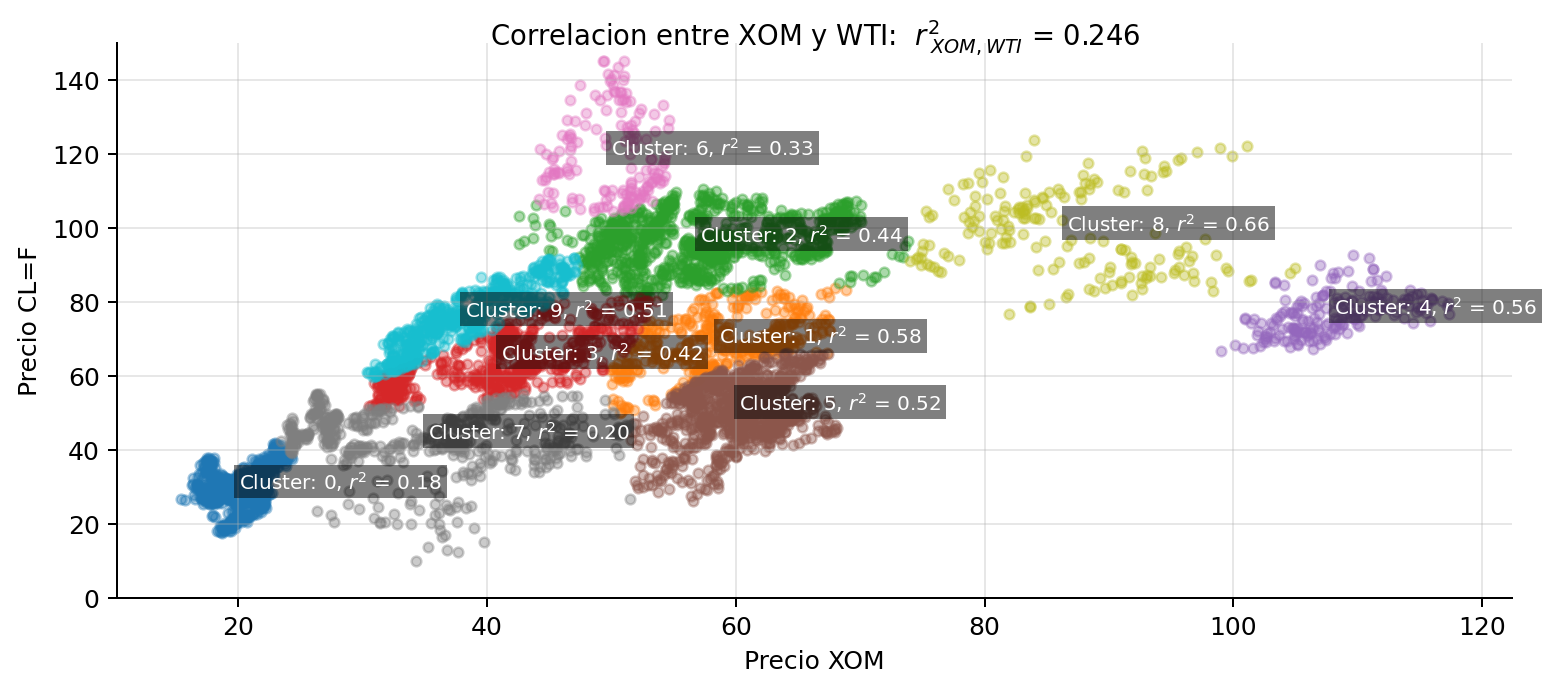

,XOM_px_medio,XOM_px_min,XOM_px_max,CL=F_px_medio,CL=F_px_min,CL=F_px_max,Cantidad,r2
0,20.088590,15.369594,24.346678,29.301901,17.450001,41.720001,968,0.179139
1,58.682995,49.908836,68.880264,68.694018,49.939999,83.820000,458,0.583761
2,57.111752,42.534706,73.882393,96.237004,81.220001,110.529999,1008,0.439649
3,41.111631,30.483202,53.595566,64.225847,51.610001,80.949997,608,0.420096
4,108.104369,98.981102,117.321945,76.757376,66.739998,92.610001,202,0.561032
5,60.265212,51.609318,68.126434,50.700292,26.209999,66.099998,1063,0.517477
6,49.994051,44.212879,54.629997,119.572308,104.480003,145.289993,156,0.327047
7,35.215431,23.404083,51.508324,42.878206,-37.630001,55.169998,577,0.203106
8,86.626913,74.016342,104.965576,99.109050,76.709999,123.699997,179,0.659660
9,38.253396,30.348782,47.218025,75.875168,59.759998,91.860001,564,0.513348


In [ ]:
viewGMM(['XOM', 'CL=F'], components=10)

# Reduccion de dimensionalidad

| Característica/Algoritmo             | PCA                                   | t-SNE                                | LDA                                    | UMAP                                   |
|--------------------------------------|---------------------------------------|--------------------------------------|----------------------------------------|----------------------------------------|
| **Objetivo principal**               | Maximizar varianza                    | Mantener estructura local            | Maximizar separación de clases         | Preservar estructura local y global    |
| **Tipo**                             | Lineal                                | No lineal                            | Lineal                                 | No lineal                              |
| **Supervisado**                      | No                                    | No                                   | Sí                                     | No                                     |
| **Requiere etiquetas**               | No                                    | No                                   | Sí                                     | No                                     |
| **Interpretabilidad**                | Alta (direcciones de varianza)        | Baja (estructura compleja)           | Media (orientado a clases)             | Baja (estructura compleja)             |
| **Consistencia de resultados**       | Sí (determinístico)                   | No (estocástico)                      | Sí (determinístico)                    | Generalmente sí                        |
| **Velocidad**    | Rápido                                | Puede ser lento                       | Variable                               | Más rápido que t-SNE                   |
| **Uso típico**                       | Análisis exploratorio, data mining | Visualización de clusters | Clasificación                        | Visualización, reducción no lineal     |


## PCA

__Algoritmo PCA (Principal Component Analysis)__

1. Centralizar los datos
Dado un conjunto de datos $X$ de dimension $n \times d$, calculamos la media de cada característica y centralizamos los datos
$$ \mu_j = \mathbb{E}[X_j] $$
$$ Z_{ij} = X_{ij} - \mu_j $$

2. Calcular la matriz de covarianza
$$ S = \frac{1}{n} Z^T Z $$

3. Resolver el problema de autovalores y autovectores
Para la matriz de covarianza $S$, encontramos sus autovalores $\lambda$ y autovectores $v$:
$$ Sv = \lambda v $$

4. Ordenar los autovalores y seleccionar autovectores
<br>Ordenamos los autovalores en orden descendente y seleccionamos los $k$ primeros autovectores para formar una matriz $W$ de dimensión $d \times k$

5. Proyectar los datos en el nuevo espacio
$$ Y = ZW $$
Donde $Y$ es el conjunto de datos transformado de dimensión $n \times k$

In [ ]:
data.columns

Index(['Unnamed: 0', 'symbol', 'date', 'strikes_spread',
       'calls_contracts_traded', 'puts_contracts_traded',
       'calls_open_interest', 'puts_open_interest', 'expirations_number',
       'DITM_IV', 'ITM_IV', 'sITM_IV', 'ATM_IV', 'sOTM_IV', 'OTM_IV',
       'DOTM_IV', 'contracts_number', 'hv_20', 'hv_40', 'hv_60', 'hv_75',
       'hv_90', 'hv_120', 'hv_180', 'hv_200', 'VIX'],
      dtype='object')

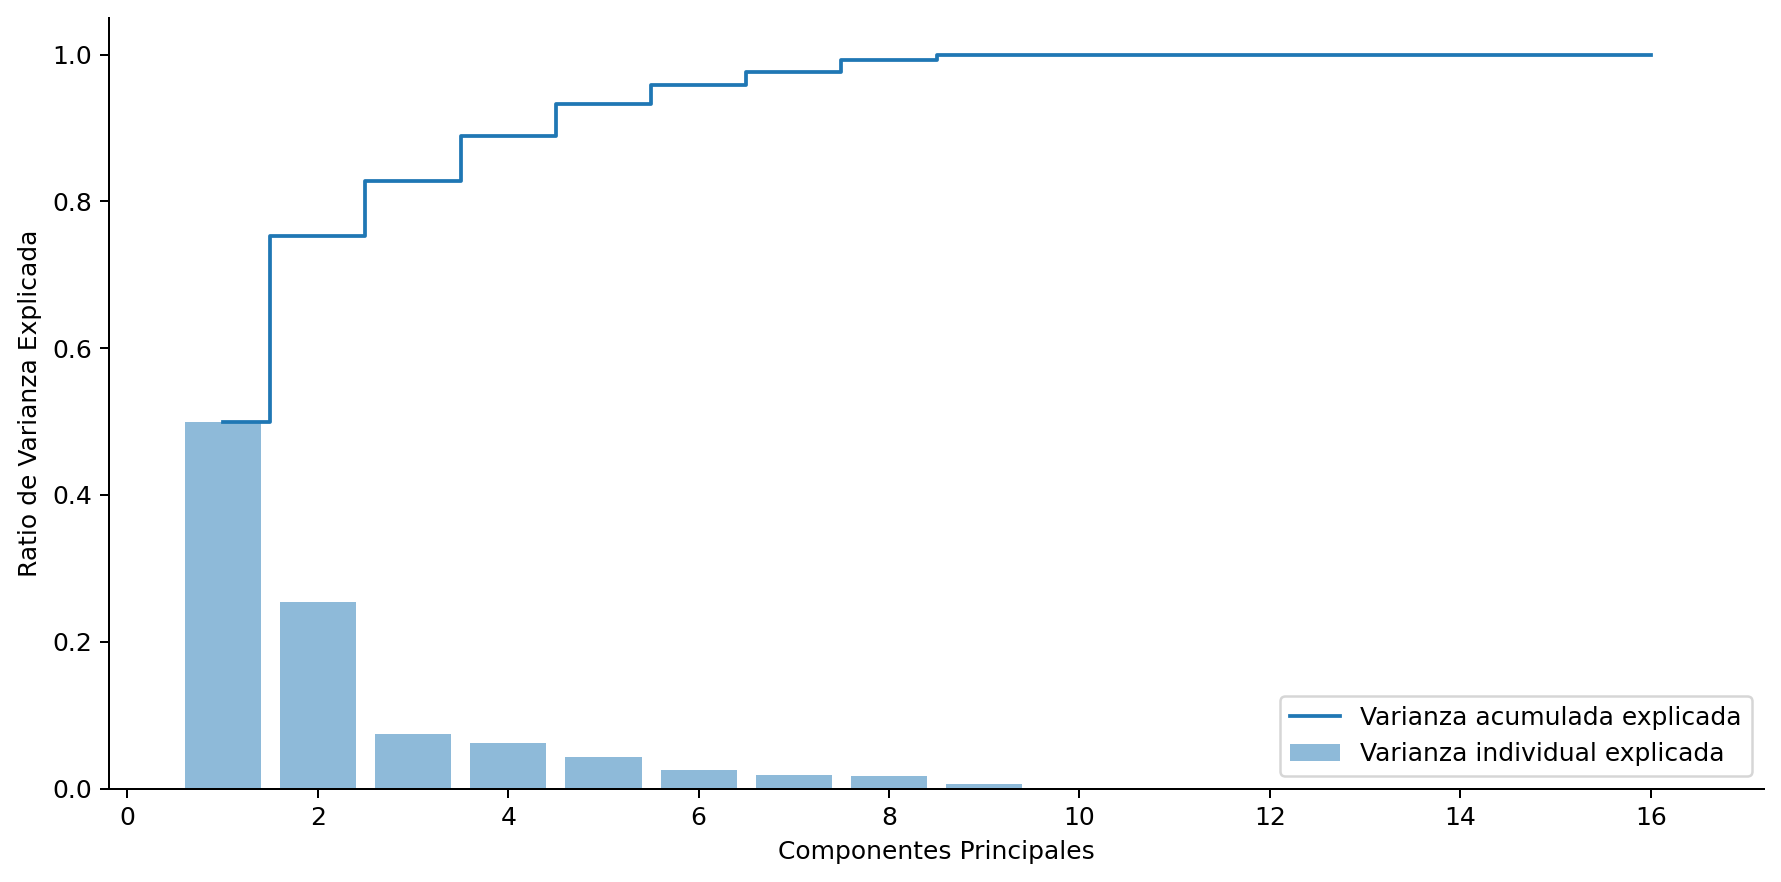

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_cols = ['strikes_spread', 'calls_contracts_traded', 'puts_contracts_traded',
           'calls_open_interest', 'puts_open_interest', 'expirations_number',
           'contracts_number', 'hv_20', 'hv_40', 'hv_60', 'hv_75',
           'hv_90', 'hv_120', 'hv_180', 'hv_200', 'VIX']

features = data[features_cols]

# 1. Estandarizar los features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Aplicar PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_features)

# 3. Visualizar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Varianza individual explicada')
ax.step(range(1, len(explained_variance)+1), np.cumsum(explained_variance), where='mid', label='Varianza acumulada explicada')
ax.set_ylabel('Ratio de Varianza Explicada')
ax.set_xlabel('Componentes Principales')
ax.legend(loc='best')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()